In [1]:
# Import Dependencies
import pandas as pd 
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# import tensorflow as tf

In [2]:
# Read CSV file from Resources folder into Pandas DataFrame
file = Path('./Resources_sdt/survey.csv')
survey_df = pd.read_csv(file)

# Review DataFrame
survey_df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [3]:
# Get DataFrame info
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [4]:
# Determine number of unique values in each column
survey_df.nunique()

Timestamp                    1246
Age                            53
Gender                         49
Country                        48
state                          45
self_employed                   2
family_history                  2
treatment                       2
work_interfere                  4
no_employees                    6
remote_work                     2
tech_company                    2
benefits                        3
care_options                    3
wellness_program                3
seek_help                       3
anonymity                       3
leave                           5
mental_health_consequence       3
phys_health_consequence         3
coworkers                       3
supervisor                      3
mental_health_interview         3
phys_health_interview           3
mental_vs_physical              3
obs_consequence                 2
comments                      160
dtype: int64

## Check Age Ranges within the Dataset
Verify ages for authenticity, clean data as needed.

In [5]:
# Look at 'Age' value counts
age_ranges = survey_df['Age'].value_counts()
age_ranges

Age
 29             85
 32             82
 26             75
 27             71
 33             70
 28             68
 31             67
 34             65
 30             63
 25             61
 35             55
 23             51
 24             46
 37             43
 38             39
 36             37
 40             33
 39             33
 43             28
 22             21
 41             21
 42             20
 21             16
 45             12
 46             12
 44             11
 19              9
 18              7
 48              6
 50              6
 20              6
 51              5
 49              4
 56              4
 57              3
 54              3
 55              3
 47              2
 60              2
 99999999999     1
 5               1
-1               1
 11              1
 8               1
 61              1
 53              1
-29              1
-1726            1
 65              1
 62              1
 58              1
 329             1
 72     

In [6]:
# Several answers for 'Age' were given with incorrect or bogus values. This is an attempt to retain the data.

# Convert the 'Age' column to numeric
survey_df['Age'] = pd.to_numeric(survey_df['Age'], errors='coerce')

# Then replace any ages less than 0 OR greater than 99 with '404' to indicate an "error"
survey_df.loc[(survey_df['Age'] < 0) | (survey_df['Age'] > 99), 'Age'] = 404

# Check the updated value counts
age_update = survey_df['Age'].value_counts()
age_update

Age
29     85
32     82
26     75
27     71
33     70
28     68
31     67
34     65
30     63
25     61
35     55
23     51
24     46
37     43
38     39
36     37
40     33
39     33
43     28
22     21
41     21
42     20
21     16
45     12
46     12
44     11
19      9
18      7
50      6
48      6
20      6
404     5
51      5
56      4
49      4
54      3
55      3
57      3
47      2
60      2
62      1
58      1
65      1
5       1
53      1
61      1
8       1
11      1
72      1
Name: count, dtype: int64

In [7]:
# check 'Age' column count
age_column = survey_df['Age'].count()
age_column

1259

In [8]:
# Sort 'Age' column into age ranges then create new column
# ----------------------------------------------
# Convert the 'Age' column to numeric
survey_df['Age'] = pd.to_numeric(survey_df['Age'], errors='coerce')

# Create a new column 'age_range' that contains the age range for each individual
survey_df['age_range'] = pd.cut(survey_df['Age'], bins=[0, 18, 25, 35, 50, 65, 100, 405], labels=['0-18', '19-25', '26-35', '36-50', '51-65', '65+', 'Other'])

# Check to make sure binning was successful
survey_df['age_range'].value_counts(dropna=False)

age_range
26-35    701
36-50    307
19-25    210
51-65     25
0-18      10
Other      5
65+        1
Name: count, dtype: int64

In [ ]:
# check NEW 'age_range' column count
age_column = survey_df['age_range'].count()
age_column

## Gender Column Cleanup
There were 49 unique genders listed. Some of these were because of input errors. Some are because of how the person represented themselves. Need to determine which they are to correct them.

In [9]:
# Look at 'Gender' value counts
gender_count = survey_df['Gender'].value_counts()
gender_count

Gender
Male                                              615
male                                              206
Female                                            121
M                                                 116
female                                             62
F                                                  38
m                                                  34
f                                                  15
Make                                                4
Male                                                3
Woman                                               3
Cis Male                                            2
Man                                                 2
Female (trans)                                      2
Female                                              2
Trans woman                                         1
msle                                                1
male leaning androgynous                            1
Neuter               

In [10]:
# There may have been misspellings in 'Gender' names and in some cases bogus answers. This is an attempt to cleanup the 'Gender' to form usable data.

# Adding Category for 'Male'
survey_df['Gender'].replace(['Male', 'male', 'M', 'm', 'Male ', 'Cis Male', 'cis male', 'Man', 
                            'Make', 'Mail', 'Cis Man', 'Guy (-ish) ^_^', 'Male-ish', 'maile', 
                            'Mal', 'Male (CIS)', 'msle', 'Malr'], 'Male', inplace=True)

# Adding Category for 'Female'
survey_df['Gender'].replace(['Female', 'female', 'F', 'f', 'Woman', 'Female ', 'Female (cis)', 
                            'cis-female/femme', 'femail', 'Cis Female', 'Femake', 'woman'], 'Female', inplace=True)

# Adding Category for 'Other' -- Note: Other will include non-specific gender and trans
survey_df['Gender'].replace(['Nah', 'All', 'fluid', 'Genderqueer', 'ostensibly male, unsure what that really means', 
                            'non-binary', 'Androgyne', 'Agender', 'Enby', 'p', 'Neuter', 'queer', 'Trans woman', 
                            'Female (trans)', 'male leaning androgynous', 'A little about you', 'Trans-female', 
                            'something kinda male?', 'queer/she/they'], 'Other', inplace=True)

# Check the updated value counts
gender_update = survey_df['Gender'].value_counts()
gender_update

Gender
Male      992
Female    247
Other      20
Name: count, dtype: int64

In [11]:
# check 'Gender' column count
gender_column = survey_df['Gender'].count()
gender_column

1259

## Count Countries & Setup Regions
Determine how many, and which, nations are in the dataset, and determine their prevalence.

In [12]:
# Look at 'Country' value counts
country_count = survey_df['Country'].value_counts()
country_count

Country
United States             751
United Kingdom            185
Canada                     72
Germany                    45
Ireland                    27
Netherlands                27
Australia                  21
France                     13
India                      10
New Zealand                 8
Poland                      7
Switzerland                 7
Sweden                      7
Italy                       7
South Africa                6
Belgium                     6
Brazil                      6
Israel                      5
Singapore                   4
Bulgaria                    4
Austria                     3
Finland                     3
Mexico                      3
Russia                      3
Denmark                     2
Greece                      2
Colombia                    2
Croatia                     2
Portugal                    2
Moldova                     1
Georgia                     1
Bahamas, The                1
China                       1
Th

In [13]:
# Create regional categories for all countries except the U.S., the U.K., and Canada
# Sort into a new column called ‘Region’ by 10 geographic regions: Africa, Asia, Central America, Eastern Europe, \ 
# Europe, Middle East, North America, Oceania, South America, and the Caribbean.

# Create mapping dictionary to associate each country with its region.
region_mapping = {
    'United States': 'United States', 
    'United Kingdom': 'United Kingdom', 
    'Canada': 'Canada', 
    'Germany': 'Europe',
    'Ireland': 'Europe',
    'Netherlands': 'Europe',
    'Australia': 'Oceania',
    'France': 'Europe',
    'India': 'Asia',
    'New Zealand': 'Oceania',
    'Poland': 'Europe',
    'Switzerland': 'Europe',
    'Sweden': 'Europe',
    'Italy': 'Europe',
    'South Africa': 'Africa',
    'Belgium': 'Europe',
    'Brazil': 'South America',
    'Israel': 'Middle East',
    'Singapore': 'Asia',
    'Bulgaria': 'Europe',
    'Austria': 'Europe',
    'Finland': 'Europe',
    'Mexico': 'North America',
    'Russia': 'Eastern Europe',
    'Denmark': 'Europe',
    'Greece': 'Europe',
    'Colombia': 'South America',
    'Croatia': 'Europe',
    'Portugal': 'Europe',
    'Moldova': 'Eastern Europe',
    'Georgia': 'Eastern Europe',
    'Bahamas, The': 'Caribbean',
    'China': 'Asia',
    'Thailand': 'Asia',
    'Czech Republic': 'Eastern Europe',
    'Norway': 'Europe',
    'Romania': 'Eastern Europe',
    'Nigeria': 'Africa',
    'Japan': 'Asia',
    'Hungary': 'Europe',
    'Bosnia and Herzegovina': 'Eastern Europe',
    'Uruguay': 'South America',
    'Spain': 'Europe',
    'Zimbabwe': 'Africa',
    'Latvia': 'Europe',
    'Costa Rica': 'Central America',
    'Slovenia': 'Europe',
    'Philippines': 'Asia',
}

# Add new column to DataFrame representing the ‘Region’ based on mapping.
survey_df['Region'] = survey_df['Country'].map(region_mapping)

# check value counts for Region column
region_check = survey_df['Region'].value_counts()
region_check

Region
United States      751
United Kingdom     185
Europe             169
Canada              72
Oceania             29
Asia                18
South America        9
Eastern Europe       8
Africa               8
Middle East          5
North America        3
Central America      1
Caribbean            1
Name: count, dtype: int64

In [ ]:
# Reorder columns to place 'age_range' and 'Region' as the first & second columns
survey_df = survey_df[['age_range', 'Region'] + [col for col in survey_df.columns if col != 'age_range' and col != 'Region']]

## Replace NULL Values and Remove Columns within the Dataset

In [14]:
# Dropping 'comments' column due to limited value-added data and droppint 'Timestamp' because the entire dataset is for 2014
# Adding option to drop 'state' to look at the dataset globally and due to the NaN values -- can comment out and rerun
# Adding option to drop 'Age' to view new age ranges column only -- can comment out and rerun
# Adding option to drop 'Country' to focus on new region column only -- can comment out and rerun
survey_df.drop(columns=['comments', 'Timestamp'], inplace=True)
survey_df.drop(columns=['state'], inplace=True)
survey_df.drop(columns=['Age'], inplace=True)
survey_df.drop(columns=['Country'], inplace=True)

In [15]:
# Replacing the NaN in the 'self_employed' and 'work_interfere' to a 'no' answer, assuming a non-answer means "No".
survey_df = survey_df.fillna({'self_employed': 'No',
                            'work_interfere': 'Never'})

survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Gender                     1259 non-null   object  
 1   self_employed              1259 non-null   object  
 2   family_history             1259 non-null   object  
 3   treatment                  1259 non-null   object  
 4   work_interfere             1259 non-null   object  
 5   no_employees               1259 non-null   object  
 6   remote_work                1259 non-null   object  
 7   tech_company               1259 non-null   object  
 8   benefits                   1259 non-null   object  
 9   care_options               1259 non-null   object  
 10  wellness_program           1259 non-null   object  
 11  seek_help                  1259 non-null   object  
 12  anonymity                  1259 non-null   object  
 13  leave                      1259 n

In [16]:
# Review random sampling of updated DataFrame
survey_df.sample(7)

,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,...,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_range,Region
208,Male,No,No,No,Never,26-100,No,Yes,Don't know,Not sure,...,No,No,Some of them,Yes,No,No,Don't know,No,19-25,United States
622,Female,No,No,Yes,Often,26-100,Yes,Yes,Yes,Yes,...,Maybe,No,Some of them,Some of them,No,Yes,Don't know,No,26-35,United States
340,Male,No,No,No,Never,26-100,No,No,Don't know,Not sure,...,No,No,Yes,Yes,No,No,No,No,26-35,United States
1184,Female,No,No,Yes,Often,6-25,No,Yes,No,Yes,...,Yes,Maybe,Some of them,Some of them,No,No,Don't know,No,26-35,United States
11,Male,No,No,No,Never,100-500,Yes,Yes,Don't know,Not sure,...,No,No,Yes,Yes,Yes,Yes,Don't know,No,26-35,Europe
374,Female,No,Yes,Yes,Rarely,26-100,No,Yes,Don't know,Not sure,...,Yes,No,Some of them,No,No,Yes,Don't know,No,19-25,United States
1072,Male,No,No,No,Rarely,More than 1000,No,Yes,Yes,Yes,...,Maybe,Maybe,Some of them,No,No,No,Yes,Yes,36-50,United States


In [17]:
# Export the updated CSV file

survey_df.to_csv('./Output/clean_survey.csv', index=False)

## Continue Preprocessing Data

In [18]:
# 
age_df = survey_df[['age_range', 'Region', 'Gender', 'coworkers', 'supervisor', 'obs_consequence']]

<AxesSubplot:xlabel='age_range'>

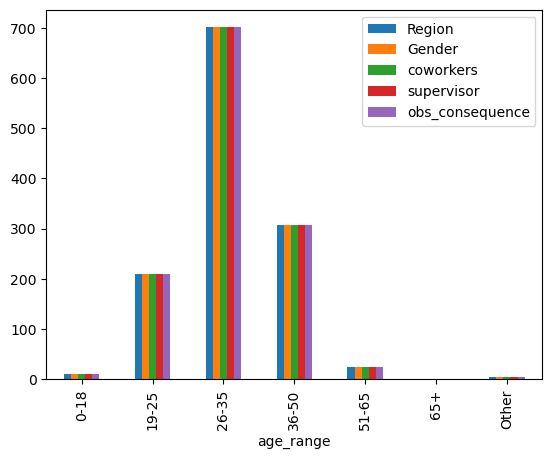

In [20]:
age_df.groupby('age_range').count().plot(kind='bar')